In [1]:
import deorbit
import matplotlib.pyplot as plt
import deorbit.data_models

In [2]:
print(f"Available sim methods: {list(deorbit.simulator.get_available_sim_methods().keys())}")
print(f"Available sim methods: {list(deorbit.simulator.get_available_atmos_models().keys())}")

Available sim methods: ['euler', 'adams_bashforth', 'RK4']
Available sim methods: ['simple_atmos', 'icao_standard_atmos', 'coesa_atmos', 'coesa_atmos_fast']


In [3]:
sim = deorbit.simulator.Simulator(
    deorbit.data_models.sim.SimConfig(
        initial_state=(deorbit.constants.EARTH_RADIUS + 100000, 0, 0, 8000),
        simulation_method_kwargs=deorbit.data_models.methods.RK4Kwargs(time_step=0.1),
        atmosphere_model_kwargs=deorbit.data_models.atmos.CoesaFastKwargs()
    )
)

In [4]:
sim.run(150000)

Running simulation with RK4 integrator


 79%|███████▉  | 118549/150000 [00:15<00:04, 7625.12it/s]

Ran 118549 iterations at time step of 0.1 seconds
Impacted at [4148161.13805313 4835535.03817665] at velocity [-32.34916645 -37.70960737] at simulated time 11854.900000025596s.
Simulation finished in 15.41755 seconds


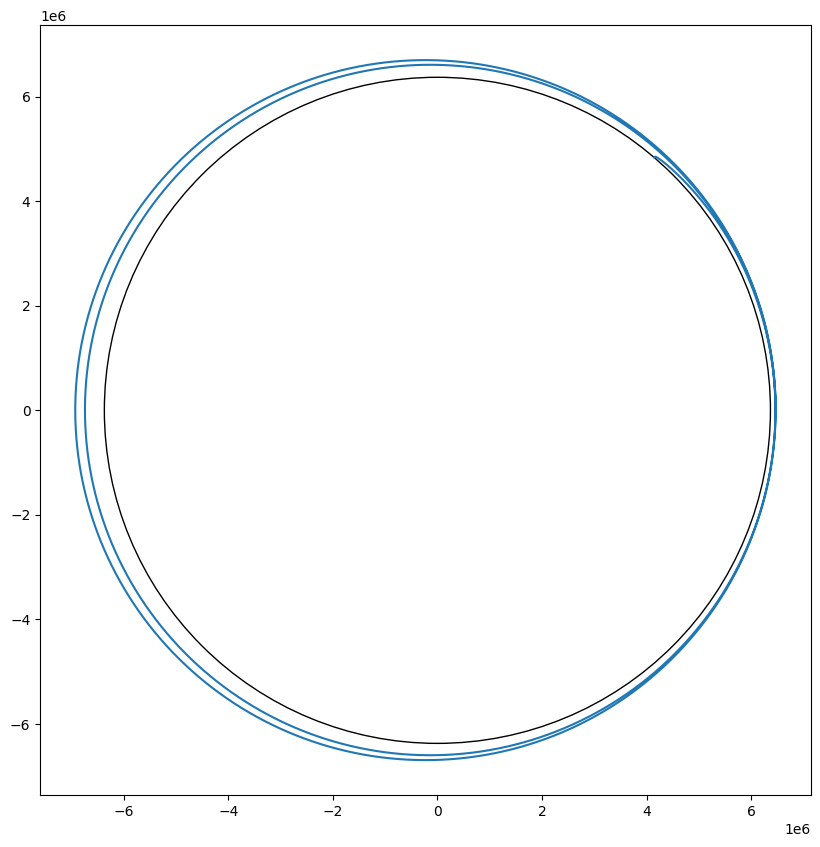

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.plot(sim.x1, sim.x2)
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax.add_patch(earth)
ax.axis("scaled")
plt.show()

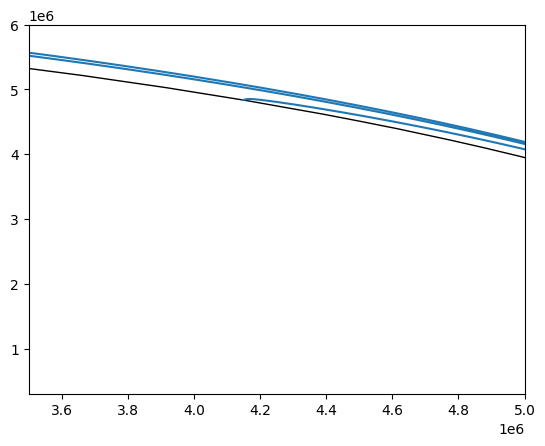

In [6]:
fig, ax = plt.subplots()
ax.plot(sim.x1, sim.x2)
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax.add_patch(earth)
ax.set_xlim([3.5e6, 5e6])
ax.set_ylim([3e5, 6e6])
# ax.axis("scaled")
plt.show()

# sim.save_data("../mir_data/")
